<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/%EB%82%B4%EC%8B%A0%EC%88%98%EB%8A%A5%EC%9D%98%EC%83%81%EA%B4%80_RPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법: 이 코드실행하고 런타임(runtime) 다시 실행하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
#plotly 그래프를 png, svg로 저장하는 plotly_orca 환경 구성
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [ ]:
#pandas, openpyxl 라이브러리 부르기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import openpyxl
import csv
import plotly.express as px

##  데이터 부르기 : 구글colab에 마운트(mount)하는 방법: 왼쪽 폴더아이콘을 누르기-눈동자 왼쪽 파일마운트 아이콘 클릭- /content/drive/MyDrive/python폴더의 susi_2021simple.csv파일을 불러옴
df = pd.read_csv('/content/drive/MyDrive/python/susi_jsi.csv', encoding = 'cp949')


In [3]:
#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

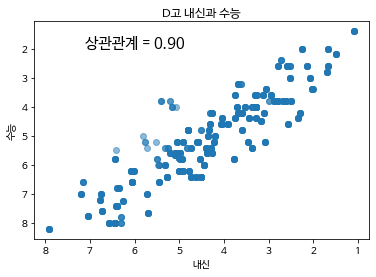

In [ ]:
#내신과 수능의 상관그래프: 비반응형 그래프

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the data
df = pd.read_csv('/content/drive/MyDrive/python/susi_jsi.csv', encoding='cp949')

# Count the number of null values in each column
null_counts = df.isnull().sum()

# Choose the variable with the lesser number of null values
if null_counts['내신_전과목'] < null_counts['등급_평균']:
    x = df['내신_전과목'].dropna().values
    y = df['등급_평균'].dropna().values[:len(x)]
else:
    y = df['등급_평균'].dropna().values
    x = df['내신_전과목'].dropna().values[:len(y)]

# Choose the minimum length of non-null values
n = min(len(x), len(y))
x = x[:n]
y = y[:n]

# Calculate the correlation coefficient
corr_coef = np.corrcoef(x, y)[0, 1]

# Create the scatter plot
plt.scatter(x, y, alpha=0.5)
plt.title('D고 내신과 수능')
plt.xlabel('내신')
plt.ylabel('수능')

# Add the correlation coefficient to the plot
plt.text(0.3, 0.9, f'상관관계 = {corr_coef:.2f}', 
         horizontalalignment='center', verticalalignment='center', 
         transform=plt.gca().transAxes, fontsize = 15)


# Reverse the x-axis and y-axis
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()


plt.show()


In [30]:
#내신과 수능의 상관그래프: 반응형 그래프


import numpy as np
import pandas as pd
import plotly.express as px

# Load the data
df = pd.read_csv('/content/drive/MyDrive/python/susi_jsi.csv', encoding='cp949')

# Count the number of null values in each column
null_counts = df.isnull().sum()

# Choose the variable with the lesser number of null values
if null_counts['내신_전과목'] < null_counts['등급_평균']:
    x = df['내신_전과목'].dropna().values
    y = df['등급_평균'].dropna().values[:len(x)]
else:
    y = df['등급_평균'].dropna().values
    x = df['내신_전과목'].dropna().values[:len(y)]

# Choose the minimum length of non-null values
n = min(len(x), len(y))
x = x[:n]
y = y[:n]

# Calculate the correlation coefficient
corr_coef = np.corrcoef(x, y)[0, 1]

# Create the scatter plot
fig = px.scatter(x=x, y=y, color_discrete_sequence=["#000000"])
fig.update_layout(title='D고 내신과 수능', xaxis_title='내신', yaxis_title='수능')
fig.update_layout(
    xaxis=dict(
        tickmode='linear',
        tick0=8,
        dtick=-1,
        range=[8, 1]
    )
)
fig.update_layout(
    yaxis=dict(
        tickmode='linear',
        tick0=8,
        dtick=-1,
        range=[9, 1]
    )
)
fig.update_layout(
    annotations=[dict(
        x=0.5,
        y=0.9,
        xref='paper',
        yref='paper',
        text=f'상관관계 = {corr_coef:.2f}',
        showarrow=False,
        font=dict(size=15)
    )]
)

fig.show()

# Save the plot in HTML format
fig.write_html("/content/drive/MyDrive/python/dungchon/plot_d/scatterplot.html")

# Save the plot in PDF format
#fig.write_pdf("/content/drive/MyDrive/python/dungchon/plot_d/scatterplot.pdf")

# Save the plot in PNG format
fig.write_image("/content/drive/MyDrive/python/dungchon/plot_d/scatterplot.png")


#자료: https://plotly.com/python/orca-management/
#자료: https://plotly.com/python/line-and-scatter/